# The prior_distributions_2D plot in the paper.

In [1]:
%matplotlib inline

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import kepler_kinematics as kek

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

plotpar = {'axes.labelsize': 30,
                  'font.size': 12,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

Load data.

In [5]:
df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
mu, cov = kek.get_prior()
print(np.shape(cov))

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(4, 4)


Function for plotting an ellipse

In [8]:
def confidence_ellipse_mod(x, y, cov, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Define variables for plotting

In [9]:
box = 200
lnD = np.log(df.r_est.values * 1e-3)
m = np.isfinite(df.vx.values) & np.isfinite(df.vy.values) & np.isfinite(df.vz.values) & np.isfinite(lnD)
vx_c, vy_c, vz_c, lnD_c = df.vx.values[m], df.vy.values[m], df.vz.values[m], lnD[m]
medx, medy, medz = np.median(vx_c), np.median(vy_c), np.median(vz_c)
xlim, ylim, zlim, dlim = (medx-box, medx+box), (medy-box, medy+box), (medz-box, medz+box), (-3, 2)

alpha, ms, lw, lalpha = .1, 2, 1, 1.
color = "k" #lightseagreen"
cmap = "viridis_r"
vmin, vmax = 0, .1

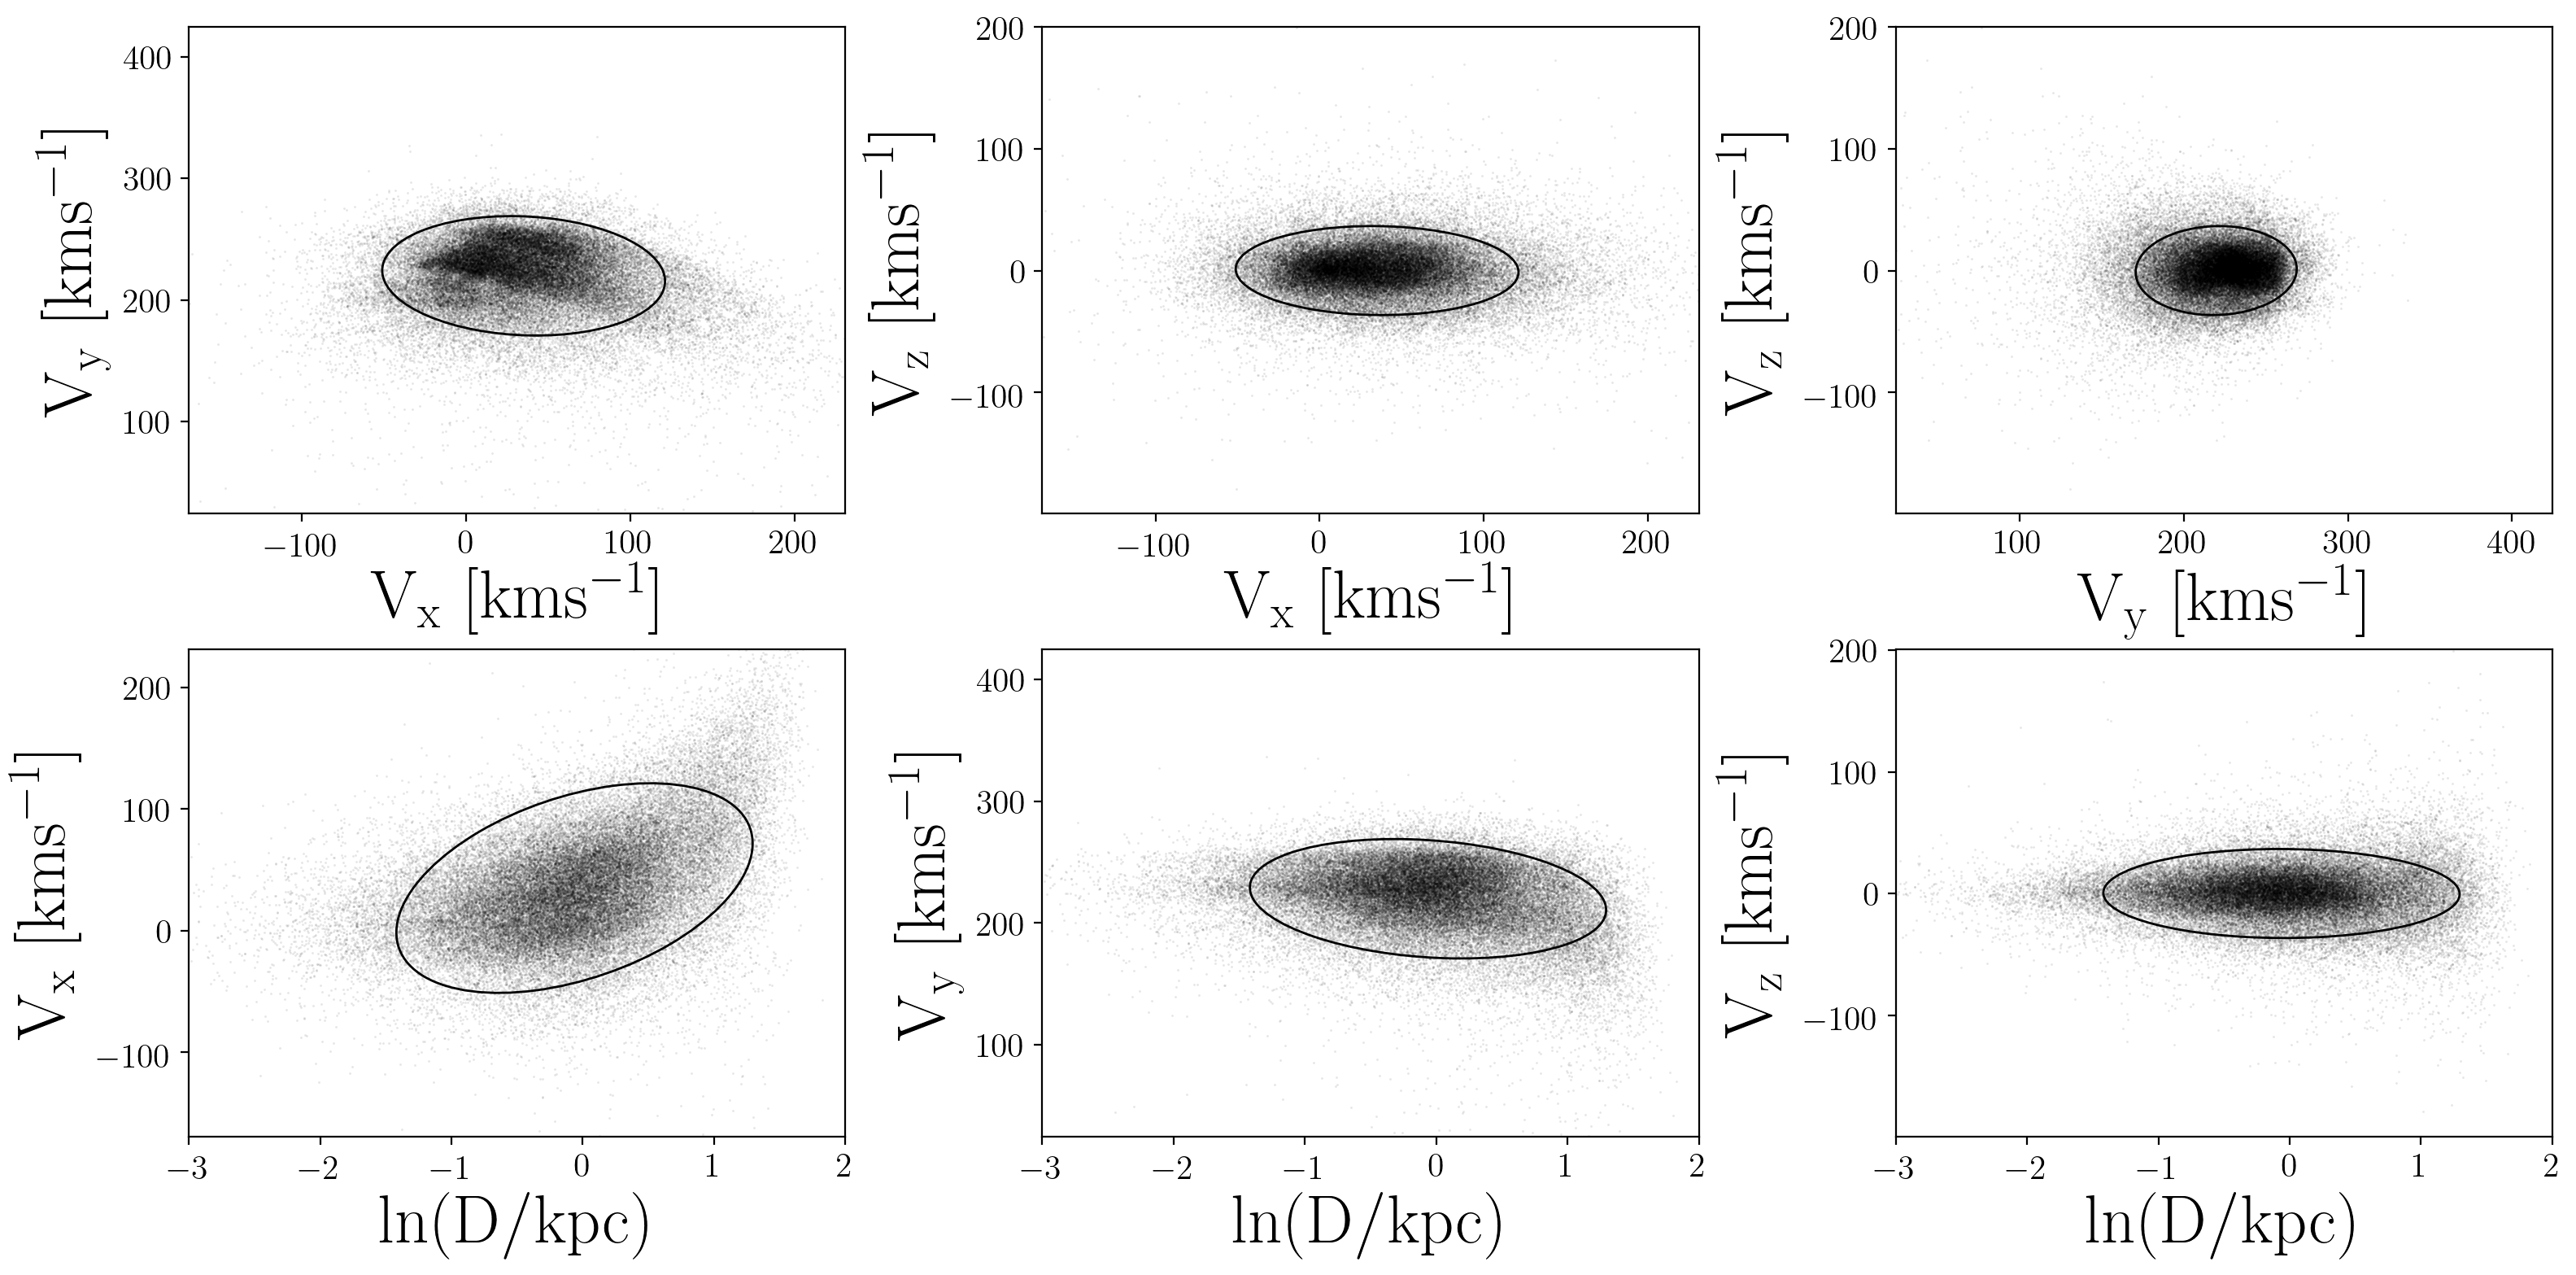

In [12]:
fig = plt.figure(figsize=(16, 8), dpi=200)
ax0 = fig.add_subplot(231)
ax0.plot(vx_c, vy_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[0, 0], cov[0, 1]], [cov[1, 0], cov[1, 1]]])
# confidence_ellipse_mod(vx_c, vy_c, _cov, ax0, n_std=2, edgecolor="w", lw=2, zorder=1)
# confidence_ellipse_mod(vx_c, vy_c, _cov, ax0, n_std=1, edgecolor="w", lw=2, zorder=1)
confidence_ellipse_mod(vx_c, vy_c, _cov, ax0, n_std=2, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
# confidence_ellipse_mod(vx_c, vy_c, _cov, ax0, n_std=1, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax0.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")

ax1 = fig.add_subplot(232)
ax1.plot(vx_c, vz_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[0, 0], cov[0, 2]], [cov[2, 0], cov[2, 2]]])
# confidence_ellipse_mod(vx_c, vz_c, _cov, ax1, n_std=2, edgecolor="w", lw=2, zorder=1)
# confidence_ellipse_mod(vx_c, vz_c, _cov, ax1, n_std=1, edgecolor="w", lw=2, zorder=1)
confidence_ellipse_mod(vx_c, vz_c, _cov, ax1, n_std=2, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
# confidence_ellipse_mod(vx_c, vz_c, _cov, ax1, n_std=1, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
ax1.set_xlim(xlim)
ax1.set_ylim(zlim)
ax1.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax1.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")

ax2 = fig.add_subplot(233)
ax2.plot(vy_c, vz_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[1, 1], cov[1, 2]], [cov[2, 1], cov[2, 2]]])
# confidence_ellipse_mod(vy_c, vz_c, _cov, ax2, n_std=2, edgecolor="w", lw=2, zorder=1)
# confidence_ellipse_mod(vy_c, vz_c, _cov, ax2, n_std=1, edgecolor="w", lw=2, zorder=1) 
confidence_ellipse_mod(vy_c, vz_c, _cov, ax2, n_std=2, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
# confidence_ellipse_mod(vy_c, vz_c, _cov, ax2, n_std=1, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
ax2.set_xlim(ylim)
ax2.set_ylim(zlim)
ax2.set_xlabel("$\mathrm{V_y~[kms^{-1}]}$")
ax2.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")

ax3 = fig.add_subplot(234)
ax3.plot(lnD_c, vx_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[3, 3], cov[3, 0]], [cov[0, 3], cov[0, 0]]])
# confidence_ellipse_mod(lnD_c, vx_c, _cov, ax3, n_std=2, edgecolor="w", lw=2, zorder=1)
# confidence_ellipse_mod(lnD_c, vx_c, _cov, ax3, n_std=1, edgecolor="w", lw=2, zorder=1)
confidence_ellipse_mod(lnD_c, vx_c, _cov, ax3, n_std=2, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
# confidence_ellipse_mod(lnD_c, vx_c, _cov, ax3, n_std=1, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
ax3.set_ylabel("$\mathrm{V_x~[kms^{-1}]}$")
ax3.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax3.set_xlim(dlim)
ax3.set_ylim(xlim)

ax4 = fig.add_subplot(235)
ax4.plot(lnD_c, vy_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[3, 3], cov[3, 1]], [cov[1, 3], cov[1, 1]]])
# confidence_ellipse_mod(lnD_c, vy_c, _cov, ax4, n_std=2, edgecolor="w", lw=2, zorder=1)
# confidence_ellipse_mod(lnD_c, vy_c, _cov, ax4, n_std=1, edgecolor="w", lw=2, zorder=1)
confidence_ellipse_mod(lnD_c, vy_c, _cov, ax4, n_std=2, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
# confidence_ellipse_mod(lnD_c, vy_c, _cov, ax4, n_std=1, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
ax4.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")
ax4.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax4.set_xlim(dlim)
ax4.set_ylim(ylim)

ax5 = fig.add_subplot(236)
ax5.plot(lnD_c, vz_c, "k.", ms=ms, alpha=alpha, mec="none", rasterized=True, zorder=0)
_cov = np.array([[cov[3, 3], cov[3, 2]], [cov[2, 3], cov[2, 2]]])
# confidence_ellipse_mod(lnD_c, vz_c, _cov, ax5, n_std=2, edgecolor="w", lw=2, zorder=1)
# confidence_ellipse_mod(lnD_c, vz_c, _cov, ax5, n_std=1, edgecolor="w", lw=2, zorder=1)
confidence_ellipse_mod(lnD_c, vz_c, _cov, ax5, n_std=2, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
# confidence_ellipse_mod(lnD_c, vz_c, _cov, ax5, n_std=1, lw=lw, edgecolor=color, zorder=1, alpha=lalpha)
ax5.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
ax5.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax5.set_xlim(dlim)
ax5.set_ylim(zlim)

plt.tight_layout()
plt.subplots_adjust(hspace=.28, wspace=.3)
plt.savefig("../plots/prior_distributions_2D")
plt.savefig("../paper/prior_distributions_2D.pdf")